## Nuclear Morphology and Chromatin Organization Features

Here we aim to compute a library of features that exhaustively describe the nuclear morphology and chromatin organization for each segmented nucleus in a given image. 

In [1]:
# import libraries
%load_ext autoreload
import sys
sys.path.append("../")

from tifffile import imread
import pandas as pd 
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import src.nuclear_features.Boundary_local_curvature as BLC
import src.nuclear_features.Boundary_global as BG
import src.nuclear_features.Int_dist_features as IDF
import src.nuclear_features.Img_texture as IT
import os


In [2]:
# initialising paths
labelled_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/images/TMA_nuc_labels.tif')
raw_image_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/images/TMA_DAPI.tif')

feature_path = os.path.join(os.path.dirname(os.getcwd()),'example_data/')

Below is an example of the data that can be used. 

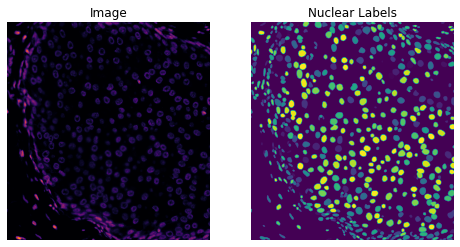

In [3]:
#Read in Images
labelled_image = imread(labelled_image_path)
raw_image = imread(raw_image_path)

#Subset the image
labelled_image=labelled_image[4000:6000,5000:7000]
raw_image=raw_image[4000:6000,5000:7000]

# normalize images
raw_image = ((raw_image-np.min(raw_image))/(np.max(raw_image)-np.min(raw_image)))*255
raw_image = raw_image.astype(int)
#Visulaise the data

#save plots to show clusters
fig = plt.figure(figsize=(8, 4))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
#show raw image 
ax0.imshow(raw_image,aspect='auto',cmap='inferno') 
ax0.axis('off')
ax0.title.set_text('Image')
#show segmented image
ax1.imshow(labelled_image,aspect='auto',cmap='viridis') 
ax1.axis('off')
ax1.title.set_text('Nuclear Labels')

One can now access each nucleus in the labelled image as well as the raw image. 

(-0.5, 58.5, 49.5, -0.5)

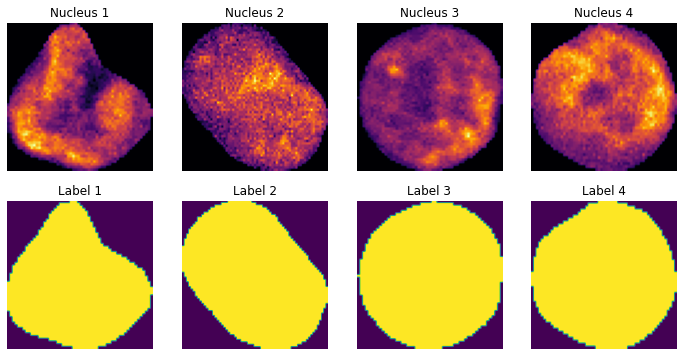

In [4]:
#Get indexing for the individual nuclei in the image
props = measure.regionprops(labelled_image,raw_image)

fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(241)
ax1 = fig.add_subplot(242)
ax2 = fig.add_subplot(243)
ax3 = fig.add_subplot(244)
ax4 = fig.add_subplot(245)
ax5 = fig.add_subplot(246)
ax6 = fig.add_subplot(247)
ax7 = fig.add_subplot(248)

#show raw image 
ax0.imshow(props[77].intensity_image,aspect='auto',cmap='inferno') 
ax0.title.set_text('Nucleus 1')
ax0.axis('off')
ax1.imshow(props[452].intensity_image,aspect='auto',cmap='inferno') 
ax1.title.set_text('Nucleus 2')
ax1.axis('off')
ax2.imshow(props[567].intensity_image,aspect='auto',cmap='inferno') 
ax2.title.set_text('Nucleus 3')
ax2.axis('off')
ax3.imshow(props[114].intensity_image,aspect='auto',cmap='inferno') 
ax3.title.set_text('Nucleus 4')
ax3.axis('off')

#show segmented image
ax4.imshow(props[77].image,aspect='auto',cmap='viridis') 
ax4.title.set_text('Label 1')
ax4.axis('off')
ax5.imshow(props[452].image,aspect='auto',cmap='viridis') 
ax5.title.set_text('Label 2')
ax5.axis('off')
ax6.imshow(props[567].image,aspect='auto',cmap='viridis') 
ax6.title.set_text('Label 3')
ax6.axis('off')
ax7.imshow(props[114].image,aspect='auto',cmap='viridis') 
ax7.title.set_text('Label 4')
ax7.axis('off')


#### Basic Features

Scikit provides several informative features that describe "region properties". First we extract such built in features. For more information on how thhe features were computed check out the documentation(https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table). 

In [5]:
#Measure scikit's built in features
propstable = pd.DataFrame(measure.regionprops_table(labelled_image,raw_image,cache=True,
                               properties=['label', 'area','perimeter','bbox_area','convex_area',
                                           'equivalent_diameter','major_axis_length','minor_axis_length',
                                           'eccentricity','orientation',
                                            'centroid','weighted_centroid',
                                           'weighted_moments','weighted_moments_normalized',
                                           'weighted_moments_central','weighted_moments_hu',
                                            'moments','moments_normalized','moments_central','moments_hu']))
propstable.iloc[[77,452,567,114]]

,label,area,perimeter,bbox_area,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,...,moments_central-3-1,moments_central-3-2,moments_central-3-3,moments_hu-0,moments_hu-1,moments_hu-2,moments_hu-3,moments_hu-4,moments_hu-5,moments_hu-6
77,726,2001,175.823376,3080,2103,50.475265,54.495764,48.982766,0.438285,1.006850,...,1.207627e+07,1.181322e+08,1.529582e+09,0.167701,0.000317,0.000495,6.930293e-06,-2.408368e-10,-1.229185e-07,3.267709e-10
452,4332,2924,204.793939,4154,2974,61.016001,73.231719,51.096477,0.716354,0.863777,...,1.092870e+08,1.604721e+08,4.380823e+10,0.170437,0.003460,0.000014,5.752388e-07,6.692535e-13,1.697934e-08,-1.505879e-12
567,5093,2369,180.509668,3074,2422,54.920893,57.529462,52.449152,0.410874,-0.200079,...,-7.458314e+06,-7.209160e+06,-1.649132e+09,0.159892,0.000217,0.000002,6.146941e-09,-3.696760e-16,-5.248116e-11,5.972517e-16
114,1135,2250,177.095454,2950,2297,53.523723,58.463251,49.138013,0.541821,-1.536446,...,-1.862287e+06,2.128491e+07,-5.627771e+08,0.162014,0.000777,0.000030,3.071775e-07,9.246938e-13,8.083977e-09,-1.341870e-13


#### Global Boundary features

Here we compute the features that describe morphology of a given object. These include 
1. Calliper distances
2. Distribution features of radii(centroid to boundary) distances

Below are features computed for 4 nuclei

In [6]:
BG_feat = pd.concat([BG.boundary_features(props[77].image,centroids=props[77].local_centroid),
           BG.boundary_features(props[452].image,centroids=props[452].local_centroid),
           BG.boundary_features(props[567].image,centroids=props[567].local_centroid),
           BG.boundary_features(props[114].image,centroids=props[114].local_centroid)])
BG_feat

,Min_Calliper,Max_Calliper,Min_Radius,Max_Radius,Med_Radius,Avg_Radius,Mode_Radius,D25_Radius,D75_Radius,Std_Radius,Feret_Max
0,46.0,57.0,17.702494,30.757048,24.835028,24.831650,17.702494,22.991404,26.970043,3.029016,55.578773
0,49.0,72.0,23.064087,35.953991,29.742074,30.026844,23.064087,26.263947,34.385308,4.170707,71.028163
0,52.0,59.0,24.573590,28.883972,26.974144,27.015661,24.573590,26.367052,27.831896,0.953302,57.489129
0,50.0,59.0,23.083801,29.598688,26.565435,26.430918,23.083801,24.967672,27.966524,1.775084,58.309519


#### Local Boundary Features

Here we compute the features that describe local curvature of a given object.

Approach:
For a given object we obtain the edge pixels and compute the local curvature of each point on the curve +/- a given stepsize. Larger steps give a smoother curvature. 
We define the local curvature between 3 points as the inverse of the radius of their circumcircle and if the circumcenter is inside the object then the sign of curvature is positive. 

Below is the radius of curvature for Nucleus 1

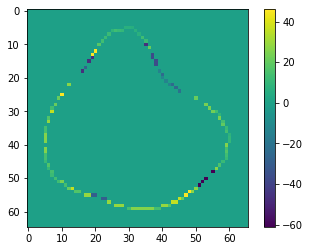

In [7]:
r_c= BLC.local_radius_curvature(props[77].image,step=5,show_boundary=True)
#calculate local curvature features
local_curvature=[np.divide(1,r_c[x]) if r_c[x]!=0 else 0 for x in range(len(r_c))]

Now that we have the local curvature for all points on the boundary, we compute features that describe it such as Average and Standard Deviation of curature (positive and negative), number of time the polarity changes etc. Feature names are self-descriptive.  

In [8]:
#compute local and global features
global_features = [BLC.global_curvature_features(np.array(local_curvature))]
global_features = pd.DataFrame([o.__dict__ for o in global_features])
global_features

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,Avg_neg_Curvature,Med_neg_Curvature,Std_neg_Curvature,Sum_neg_Curvature,Len_neg_Curvature
0,0.033344,0.04562,41,0.152808,0.059503,0.054669,0.028885,5.771751,97,0.079597,0.036139,0.033706,0.019144,0.903481,25


We also check to see if there are any prominant jumps in curvature the image. 

,num_prominant_positive_curvature,prominance_prominant_positive_curvature,width_prominant_positive_curvature,prominant_positive_curvature,num_prominant_negative_curvature,prominance_prominant_negative_curvature,width_prominant_negative_curvature,prominant_negative_curvature
0,2,0.169778,10.984083,0.134677,3,0.14652,10.740864,10.740864


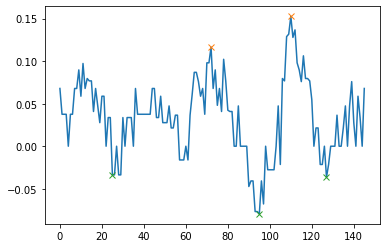

In [9]:
prominant_features = [BLC.prominant_curvature_features(local_curvature,show_plot=True)]
prominant_features = pd.DataFrame([o.__dict__ for o in prominant_features])
prominant_features


Below are the features computed for 4 nuclei. 

In [10]:
BLC_feat= pd.concat([BLC.curvature_features(props[77].image,step=5),
           BLC.curvature_features(props[452].image,step=5),
           BLC.curvature_features(props[567].image,step=5),
           BLC.curvature_features(props[114].image,step=5)])
BLC_feat

,Avg_Curvature,Std_Curvature,nPolarity_changes,Max_posi_Curvature,Avg_posi_Curvature,Med_posi_Curvature,Std_posi_Curvature,Sum_posi_Curvature,Len_posi_Curvature,Max_neg_Curvature,...,Sum_neg_Curvature,Len_neg_Curvature,num_prominant_positive_curvature,prominance_prominant_positive_curvature,width_prominant_positive_curvature,prominant_positive_curvature,num_prominant_negative_curvature,prominance_prominant_negative_curvature,width_prominant_negative_curvature,prominant_negative_curvature
0,0.033344,0.045620,41,0.152808,0.059503,0.054669,0.028885,5.771751,97,0.079597,...,0.903481,25,2,0.169778,10.9841,0.134677,3,0.146520,10.740864,10.740864
0,0.028690,0.029542,45,0.098052,0.045881,0.040807,0.016507,5.368100,117,0.033706,...,0.490859,26,1,0.116063,7.70256,0.098052,1,0.107728,22.100089,22.100089
0,0.033851,0.024016,38,0.098052,0.042840,0.037563,0.015044,5.397808,126,0.037563,...,0.184733,7,0,NA,NA,NA,1,0.113505,5.266326,5.266326
0,0.035149,0.027179,43,0.097273,0.046131,0.037563,0.018067,5.489648,119,0.047379,...,0.182183,6,2,0.106644,12.4394,0.0759428,1,0.126976,6.372449,6.372449


#### Intensity Features

Here we compute features that describe the intensity distribution.

These include features that describe the intensity distribution, entropy and heterocromatin ratios 

Below are the features computed for 4 nuclei. 

In [11]:
Int_feat= pd.concat([IDF.intensity_features(props[77].image,props[77].intensity_image),
                     IDF.intensity_features(props[452].image,props[452].intensity_image),
                     IDF.intensity_features(props[567].image,props[567].intensity_image),
                     IDF.intensity_features(props[114].image,props[114].intensity_image)])
Int_feat

,Int_Min,Int_d25,Int_Median,Int_d75,Int_Max,Int_Mean,Int_Mode,Int_SD,Int_Skewness,Int_Kurtosis,Entropy,I80_I20,nHigh_nLow,HC_area_EC_area,HC_area_Nuc_area,HC_content_EC_content,HC_content_DNA_content,HC_area,HC_content
0,0.0,28.0,39.0,50.0,83.0,38.347826,45,15.033893,0.047390,-0.545751,4.350435,2.040000,1.048544,0.083378,0.077000,0.152110,0.132028,154,10131
0,0.0,12.0,17.0,22.0,39.0,17.377565,17,6.474489,0.140601,-0.184273,3.739429,1.916667,0.856948,0.075791,0.070500,0.138721,0.121822,206,6190
0,4.0,31.0,37.0,47.0,100.0,39.690587,37,13.409393,0.783398,0.743943,4.655010,1.724138,0.846561,0.099814,0.090756,0.186042,0.156859,215,14749
0,14.0,33.0,44.0,53.0,81.0,42.671556,50,13.332638,0.144710,-0.675215,4.659602,1.896552,1.051724,0.073986,0.068889,0.123553,0.109967,155,10558


#### Image Textures
Here we compute features that describe the texture of the image.

These include the GCLM features. 

Below are the features computed for 4 nuclei. 

In [12]:
Int_Text= pd.concat([IT.texture_features(props[77].image,props[77].intensity_image,props[77].local_centroid),
                     IT.texture_features(props[452].image,props[452].intensity_image,props[452].local_centroid),
                     IT.texture_features(props[567].image,props[567].intensity_image,props[567].local_centroid),
                     IT.texture_features(props[114].image,props[114].intensity_image,props[114].local_centroid)])
Int_Text

,Contrast_1,Contrast_5,Contrast_20,dissimilarity_1,dissimilarity_5,dissimilarity_20,homogeneity_1,homogeneity_5,homogeneity_20,ASM_1,ASM_5,ASM_20,energy_1,energy_5,energy_20,correlation_1,correlation_5,correlation_20,PDI
0,71.046243,359.020404,940.721625,5.089650,12.918033,25.117517,0.422025,0.281161,0.092482,0.101798,0.054226,0.008163,0.318980,0.232529,0.089504,0.925849,0.619400,-0.052988,1.031578
0,24.760122,52.751176,160.296325,3.300821,5.133632,9.991568,0.433368,0.323807,0.147493,0.075755,0.042044,0.010722,0.275167,0.204568,0.102887,0.864663,0.703951,0.088255,0.858735
0,73.408712,357.255654,692.042979,5.705629,13.249973,20.659873,0.318610,0.186042,0.072925,0.038485,0.014025,0.003419,0.195963,0.117475,0.058270,0.909093,0.525040,0.020238,0.985787
0,78.064552,335.285798,846.835696,5.662010,12.966120,23.176024,0.329177,0.186889,0.065023,0.042098,0.015302,0.003151,0.205007,0.122763,0.055994,0.913467,0.598770,-0.080377,0.886328


#### Misc. features

We merge all features and compute some related features. 

In [13]:
features = pd.concat([propstable.iloc[[77,452,567,114]].reset_index(drop=True), 
           BG_feat.reset_index(drop=True), 
           BLC_feat.reset_index(drop=True), 
           Int_feat.reset_index(drop=True),
           Int_Text.reset_index(drop=True)], axis=1)

features['Concavity']=(features['convex_area']-features['area'])/features['convex_area']
features['Solidity']=features['area']/features['convex_area']
features['A_R']=features['minor_axis_length']/features['major_axis_length']
features['Shape_Factor']=(features['perimeter']**2)/(4*np.pi*features['area'])
features['Area_bbArea']=features['area']/features['bbox_area']
features['Center_Mismatch']=np.sqrt((features['weighted_centroid-0']-features['centroid-0'])**2+
                             (features['weighted_centroid-1']-features['centroid-1'])**2)
features['Smallest_largest_Calliper']=features['Min_Calliper']/features['Max_Calliper']
features['Frac_Peri_w_posi_curvature']=features['Len_posi_Curvature']/features['perimeter']
features['Frac_Peri_w_neg_curvature']=features['Len_neg_Curvature'].replace(to_replace ="NA",value =0)/features['perimeter']
features['Frac_Peri_w_polarity_changes']=features['nPolarity_changes']/features['perimeter']

features

,label,area,perimeter,bbox_area,convex_area,equivalent_diameter,major_axis_length,minor_axis_length,eccentricity,orientation,...,Concavity,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes
0,726,2001,175.823376,3080,2103,50.475265,54.495764,48.982766,0.438285,1.006850,...,0.048502,0.951498,0.898836,1.229409,0.649675,1.111204,0.807018,0.551690,0.142188,0.233189
1,4332,2924,204.793939,4154,2974,61.016001,73.231719,51.096477,0.716354,0.863777,...,0.016812,0.983188,0.697737,1.141424,0.703900,2.033069,0.680556,0.571306,0.126957,0.219733
2,5093,2369,180.509668,3074,2422,54.920893,57.529462,52.449152,0.410874,-0.200079,...,0.021883,0.978117,0.911692,1.094526,0.770657,2.047388,0.881356,0.698024,0.038779,0.210515
3,1135,2250,177.095454,2950,2297,53.523723,58.463251,49.138013,0.541821,-1.536446,...,0.020461,0.979539,0.840494,1.109232,0.762712,1.683355,0.847458,0.671954,0.033880,0.242807


For a quick extraction of all features given a segmented image use the following code:

In [14]:
from src.utlis.Run_nuclear_feature_extraction import run_nuclear_chromatin_feat_ext

features = run_nuclear_chromatin_feat_ext(raw_image_path,labelled_image_path,feature_path)

  0%|          | 0/5655 [00:00<?, ?it/s]

In [19]:
features_1 = features.replace('NA',0, regex=True)
features_1 = features_1.replace('NaN',0, regex=True)
features_1

,label,area,perimeter,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,convex_area,equivalent_diameter,...,Solidity,A_R,Shape_Factor,Area_bbArea,Center_Mismatch,Smallest_largest_Calliper,Frac_Peri_w_posi_curvature,Frac_Peri_w_neg_curvature,Frac_Peri_w_polarity_changes,Image
0,1,245,64.284271,5931,6395,5954,6412,391,264,17.661928,...,0.928030,0.478637,1.342250,0.626598,0.665531,0.461538,0.466677,0.295562,0.248894,TMA_nuc_labels
1,2,904,164.639610,3570,8243,3628,8272,1682,1198,33.926517,...,0.754591,0.690066,2.386109,0.537455,1.363791,0.557692,0.279398,0.455540,0.279398,TMA_nuc_labels
2,3,121,40.384776,7174,1677,7186,1691,168,129,12.412171,...,0.937984,0.745747,1.072606,0.720238,0.580976,0.733333,0.742854,0.123809,0.148571,TMA_nuc_labels
3,4,389,80.769553,7553,6603,7581,6625,616,414,22.255116,...,0.939614,0.472713,1.334553,0.631494,0.113594,0.500000,0.470474,0.309523,0.371427,TMA_nuc_labels
4,5,228,55.455844,6031,7461,6050,7477,304,236,17.038152,...,0.966102,0.698575,1.073371,0.750000,0.577248,0.714286,0.667197,0.198356,0.126227,TMA_nuc_labels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,5651,1580,146.468037,6773,4997,6820,5039,1974,1617,44.852185,...,0.977118,0.883609,1.080485,0.800405,0.589430,0.857143,0.703225,0.040965,0.184341,TMA_nuc_labels
5651,5652,2869,197.923882,5292,5456,5352,5516,3600,2917,60.439426,...,0.983545,0.992139,1.086566,0.796944,0.803696,0.936508,0.656818,0.020210,0.207150,TMA_nuc_labels
5652,5653,2510,185.781746,4572,2772,4626,2829,3078,2553,56.531684,...,0.983157,0.905210,1.094265,0.815465,0.523728,0.868852,0.667450,0.016148,0.172245,TMA_nuc_labels
5653,5654,2023,167.438600,5015,8215,5071,8262,2632,2062,50.751981,...,0.981086,0.804029,1.102822,0.768617,0.657610,0.779661,0.674874,0.041806,0.256811,TMA_nuc_labels


#### Tissue level summary:

In order to characterise the nuclear density/crowding in a given tissue, we compute the distribution characteristics of each of the above features.

The measures available are: Median, Min, Max, Standard Deviation (SD) Coefficient of Variation (CV) and Coefficient of Dispersion (CD), Inter_Quartile_Range(IQR) and Quartile Coeffient of Dispersrion (QCD).


In [22]:
from src.utlis.summarising_features import summarise_feature_table
features_1 = features.replace('NA',0, regex=True)
features_1 = features_1.replace('NaN',0, regex=True)
summarise_feature_table(features_1.drop(['Image'],axis=1))

/home/pathy_s/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/home/pathy_s/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1391: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


,median_label,median_area,median_perimeter,median_bbox-0,median_bbox-1,median_bbox-2,median_bbox-3,median_bbox_area,median_convex_area,median_equivalent_diameter,...,QCD_Concavity,QCD_Solidity,QCD_A_R,QCD_Shape_Factor,QCD_Area_bbArea,QCD_Center_Mismatch,QCD_Smallest_largest_Calliper,QCD_Frac_Peri_w_posi_curvature,QCD_Frac_Peri_w_neg_curvature,QCD_Frac_Peri_w_polarity_changes
0,2828.0,806.0,115.432504,4885.0,5802.0,4935.0,5848.0,1200.0,846.0,32.034842,...,0.308732,0.012858,0.225237,0.098975,0.077277,0.497257,0.208191,0.1995,0.50703,0.193725
